In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt


In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential


1. This project is to predict car price.
2. It is supervised machine learning development
3. We use mean absolut error as a performance measure 

In [ ]:
data=pd.read_csv('cars_dataset.csv')

In [ ]:
data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,audi
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,audi
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,audi
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0,audi
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0,audi


In [ ]:
data.shape

(72435, 10)

In [ ]:
data.tail(10)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
72425,I10,2018,7200,Manual,17879,Petrol,145.0,60.1,1.0,Hyundai
72426,I10,2018,7995,Manual,8851,Petrol,145.0,60.1,1.0,Hyundai
72427,I10,2018,7200,Manual,14788,Petrol,150.0,60.1,1.0,Hyundai
72428,Tucson,2016,12495,Manual,35000,Diesel,30.0,61.7,1.7,Hyundai
72429,Santa Fe,2019,29995,Semi-Auto,1567,Diesel,145.0,39.8,2.2,Hyundai
72430,I30,2016,8680,Manual,25906,Diesel,0.0,78.4,1.6,Hyundai
72431,I40,2015,7830,Manual,59508,Diesel,30.0,65.7,1.7,Hyundai
72432,I10,2017,6830,Manual,13810,Petrol,20.0,60.1,1.0,Hyundai
72433,Tucson,2018,13994,Manual,23313,Petrol,145.0,44.8,1.6,Hyundai
72434,Tucson,2016,15999,Automatic,11472,Diesel,125.0,57.6,1.7,Hyundai


In [ ]:
data.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax             float64
mpg             float64
engineSize      float64
Make             object
dtype: object

In [ ]:
data['model'].value_counts()

 Fiesta             6556
 Golf               4863
 Focus              4588
 Polo               3287
 3 Series           2443
                    ... 
 A2                    1
 Escort                1
 Transit Tourneo       1
 Amica                 1
 Ranger                1
Name: model, Length: 146, dtype: int64

In [ ]:
pd.isnull(data)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
72430,False,False,False,False,False,False,False,False,False,False
72431,False,False,False,False,False,False,False,False,False,False
72432,False,False,False,False,False,False,False,False,False,False
72433,False,False,False,False,False,False,False,False,False,False


In [ ]:
data_one=data.dropna(how='any')

In [ ]:
data_one['model'].describe()

count       72435
unique        146
top        Fiesta
freq         6556
Name: model, dtype: object

In [ ]:
data_one['price'].describe()

count     72435.000000
mean      16580.158708
std        9299.028754
min         495.000000
25%       10175.000000
50%       14495.000000
75%       20361.000000
max      145000.000000
Name: price, dtype: float64

In [ ]:
print(data_one[data_one['price']==495.0])

        model  year  price transmission  ...    tax   mpg  engineSize  Make
38552   Focus  2003    495       Manual  ...  200.0  41.5         1.6  Ford

[1 rows x 10 columns]


In [ ]:
data_one['Make'].unique().tolist()

['audi', 'BMW', 'Ford', 'vw', 'toyota', 'skoda', 'Hyundai']

In [ ]:
data_one['Make'].value_counts()

Ford       17964
vw         15157
BMW        10781
audi       10668
toyota      6738
skoda       6267
Hyundai     4860
Name: Make, dtype: int64

In [ ]:
data_one[data_one['Make']=='Ford']

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
21449,Fiesta,2017,12000,Automatic,15944,Petrol,150.0,57.7,1.0,Ford
21450,Focus,2018,14000,Manual,9083,Petrol,150.0,57.7,1.0,Ford
21451,Focus,2017,13000,Manual,12456,Petrol,150.0,57.7,1.0,Ford
21452,Fiesta,2019,17500,Manual,10460,Petrol,145.0,40.3,1.5,Ford
21453,Fiesta,2019,16500,Automatic,1482,Petrol,145.0,48.7,1.0,Ford
...,...,...,...,...,...,...,...,...,...,...
39408,Fiesta,2016,7999,Manual,31348,Petrol,125.0,54.3,1.2,Ford
39409,B-MAX,2017,8999,Manual,16700,Petrol,150.0,47.1,1.4,Ford
39410,B-MAX,2014,7499,Manual,40700,Petrol,30.0,57.7,1.0,Ford
39411,Focus,2015,9999,Manual,7010,Diesel,20.0,67.3,1.6,Ford


In [ ]:
data_one[data_one['Make']=='vw']

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
39413,T-Roc,2019,25000,Automatic,13904,Diesel,145.0,49.6,2.0,vw
39414,T-Roc,2019,26883,Automatic,4562,Diesel,145.0,49.6,2.0,vw
39415,T-Roc,2019,20000,Manual,7414,Diesel,145.0,50.4,2.0,vw
39416,T-Roc,2019,33492,Automatic,4825,Petrol,145.0,32.5,2.0,vw
39417,T-Roc,2019,22900,Semi-Auto,6500,Petrol,150.0,39.8,1.5,vw
...,...,...,...,...,...,...,...,...,...,...
54565,Eos,2012,5990,Manual,74000,Diesel,125.0,58.9,2.0,vw
54566,Fox,2008,1799,Manual,88102,Petrol,145.0,46.3,1.2,vw
54567,Fox,2009,1590,Manual,70000,Petrol,200.0,42.0,1.4,vw
54568,Fox,2006,1250,Manual,82704,Petrol,150.0,46.3,1.2,vw


In [ ]:
onehot_encoded_maker=pd.get_dummies(data_one.Make,prefix='man')

In [ ]:
onehot_encoded_maker.head()

,man_BMW,man_Ford,man_Hyundai,man_audi,man_skoda,man_toyota,man_vw
0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0


In [ ]:
onehot_encoded_transmission=pd.get_dummies(data_one.transmission,prefix='tans')

In [ ]:
onehot_encoded_transmission.head()

,tans_Automatic,tans_Manual,tans_Other,tans_Semi-Auto
0,0,1,0,0
1,1,0,0,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0


In [ ]:
data_one=data_one.drop(['Make'],axis=1)

In [ ]:
data_one=data_one.drop(['transmission'],axis=1)

In [ ]:

data_one.columns

Index(['year', 'price', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize'], dtype='object')

In [ ]:
data_one.head()

,year,price,mileage,fuelType,tax,mpg,engineSize
0,2017,12500,15735,Petrol,150.0,55.4,1.4
1,2016,16500,36203,Diesel,20.0,64.2,2.0
2,2016,11000,29946,Petrol,30.0,55.4,1.4
3,2017,16800,25952,Diesel,145.0,67.3,2.0
4,2019,17300,1998,Petrol,145.0,49.6,1.0


In [ ]:
onehot_encode_fueltype=pd.get_dummies(data_one.fuelType,prefix='fuel')

In [ ]:
onehot_encode_fueltype.head()

,fuel_Diesel,fuel_Electric,fuel_Hybrid,fuel_Other,fuel_Petrol
0,0,0,0,0,1
1,1,0,0,0,0
2,0,0,0,0,1
3,1,0,0,0,0
4,0,0,0,0,1


In [ ]:
one_data_2_no_make=pd.concat([data_one,onehot_encode_fueltype,onehot_encoded_transmission],axis=1)

In [ ]:
one_data_2_no_make.head()

,year,price,mileage,fuelType,tax,mpg,engineSize,fuel_Diesel,fuel_Electric,fuel_Hybrid,fuel_Other,fuel_Petrol,tans_Automatic,tans_Manual,tans_Other,tans_Semi-Auto
0,2017,12500,15735,Petrol,150.0,55.4,1.4,0,0,0,0,1,0,1,0,0
1,2016,16500,36203,Diesel,20.0,64.2,2.0,1,0,0,0,0,1,0,0,0
2,2016,11000,29946,Petrol,30.0,55.4,1.4,0,0,0,0,1,0,1,0,0
3,2017,16800,25952,Diesel,145.0,67.3,2.0,1,0,0,0,0,1,0,0,0
4,2019,17300,1998,Petrol,145.0,49.6,1.0,0,0,0,0,1,0,1,0,0


In [ ]:
one_data_2_make=pd.concat([one_data_2_no_make,onehot_encoded_maker],axis=1)

In [ ]:
one_data_2_make.head()

,year,price,mileage,fuelType,tax,mpg,engineSize,fuel_Diesel,fuel_Electric,fuel_Hybrid,fuel_Other,fuel_Petrol,tans_Automatic,tans_Manual,tans_Other,tans_Semi-Auto,man_BMW,man_Ford,man_Hyundai,man_audi,man_skoda,man_toyota,man_vw
0,2017,12500,15735,Petrol,150.0,55.4,1.4,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0
1,2016,16500,36203,Diesel,20.0,64.2,2.0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,2016,11000,29946,Petrol,30.0,55.4,1.4,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0
3,2017,16800,25952,Diesel,145.0,67.3,2.0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,2019,17300,1998,Petrol,145.0,49.6,1.0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0


In [ ]:
one_data_2_make=one_data_2_make.drop(['fuelType'],axis=1)

In [ ]:
one_data_2_no_make=one_data_2_no_make.drop(['fuelType'],axis=1)

In [ ]:
one_data_2_make.head()

,model,year,price,mileage,tax,mpg,engineSize,fuel_Diesel,fuel_Electric,fuel_Hybrid,fuel_Other,fuel_Petrol,tans_Automatic,tans_Manual,tans_Other,tans_Semi-Auto,man_BMW,man_Ford,man_Hyundai,man_audi,man_skoda,man_toyota,man_vw
0,A1,2017,12500,15735,150.0,55.4,1.4,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0
1,A6,2016,16500,36203,20.0,64.2,2.0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,A1,2016,11000,29946,30.0,55.4,1.4,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0
3,A4,2017,16800,25952,145.0,67.3,2.0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,A3,2019,17300,1998,145.0,49.6,1.0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0


In [ ]:
one_data_2_no_make.head()

,model,year,price,mileage,tax,mpg,engineSize,fuel_Diesel,fuel_Electric,fuel_Hybrid,fuel_Other,fuel_Petrol,tans_Automatic,tans_Manual,tans_Other,tans_Semi-Auto
0,A1,2017,12500,15735,150.0,55.4,1.4,0,0,0,0,1,0,1,0,0
1,A6,2016,16500,36203,20.0,64.2,2.0,1,0,0,0,0,1,0,0,0
2,A1,2016,11000,29946,30.0,55.4,1.4,0,0,0,0,1,0,1,0,0
3,A4,2017,16800,25952,145.0,67.3,2.0,1,0,0,0,0,1,0,0,0
4,A3,2019,17300,1998,145.0,49.6,1.0,0,0,0,0,1,0,1,0,0


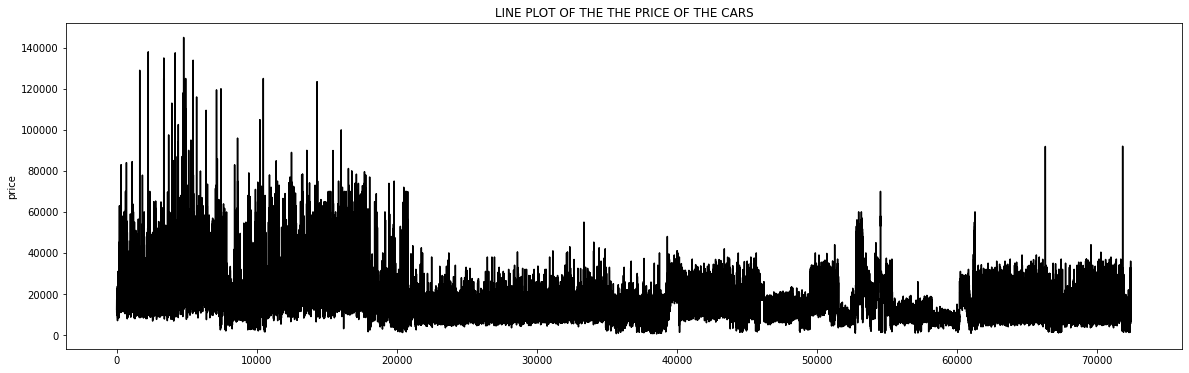

In [ ]:
import seaborn as sns
plt.figure(figsize=(20,6))
plt.title("LINE PLOT OF THE THE PRICE OF THE CARS")
sns.lineplot(data=one_data_2_make['price'],color='black')

{'boxes': [<matplotlib.lines.Line2D at 0x7fe0d1ff47d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fe0d1ff77d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fe0d1ffc810>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fe0d1ffc2d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fe0d1ff4d10>,
  <matplotlib.lines.Line2D at 0x7fe0d1ff7290>]}

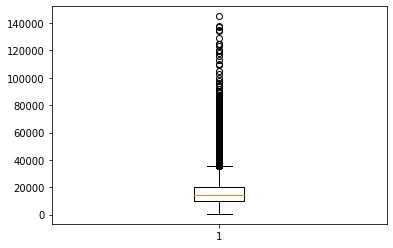

In [ ]:
plt.boxplot(one_data_2_make['price'])

In [ ]:
one_data_2_make.columns

Index(['model', 'year', 'price', 'mileage', 'tax', 'mpg', 'engineSize',
       'fuel_Diesel', 'fuel_Electric', 'fuel_Hybrid', 'fuel_Other',
       'fuel_Petrol', 'tans_Automatic', 'tans_Manual', 'tans_Other',
       'tans_Semi-Auto', 'man_BMW', 'man_Ford', 'man_Hyundai', 'man_audi',
       'man_skoda', 'man_toyota', 'man_vw'],
      dtype='object')

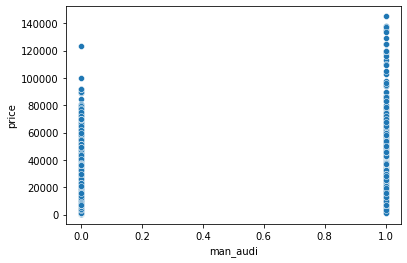

In [ ]:
sns.scatterplot(x=one_data_2_make['man_audi'],y=one_data_2_make['price'])

In [ ]:
one_data_2_make.columns

Index(['model', 'year', 'price', 'mileage', 'tax', 'mpg', 'engineSize',
       'fuel_Diesel', 'fuel_Electric', 'fuel_Hybrid', 'fuel_Other',
       'fuel_Petrol', 'tans_Automatic', 'tans_Manual', 'tans_Other',
       'tans_Semi-Auto', 'man_BMW', 'man_Ford', 'man_Hyundai', 'man_audi',
       'man_skoda', 'man_toyota', 'man_vw'],
      dtype='object')

In [ ]:
X=one_data_2_make.drop(['price'],axis=1)

In [ ]:
X=X.drop(['model'],axis=1)

In [ ]:
X.head()

,year,mileage,tax,mpg,engineSize,fuel_Diesel,fuel_Electric,fuel_Hybrid,fuel_Other,fuel_Petrol,tans_Automatic,tans_Manual,tans_Other,tans_Semi-Auto,man_BMW,man_Ford,man_Hyundai,man_audi,man_skoda,man_toyota,man_vw
0,2017,15735,150.0,55.4,1.4,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0
1,2016,36203,20.0,64.2,2.0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,2016,29946,30.0,55.4,1.4,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0
3,2017,25952,145.0,67.3,2.0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,2019,1998,145.0,49.6,1.0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0


In [ ]:
Y=one_data_2_make['price']

In [ ]:
X.shape

(72435, 21)

In [ ]:
Y.shape

(72435,)

In [ ]:
X1=X.values

In [ ]:
Y1=Y.values

In [ ]:
X1.dtype

dtype('float64')

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X1,Y1,test_size=0.2,random_state=0)

In [ ]:
x_train

array([[2.0190e+03, 1.0300e+02, 1.4500e+02, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.0190e+03, 1.5753e+04, 1.4500e+02, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.0170e+03, 2.3694e+04, 1.4500e+02, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [2.0190e+03, 1.4306e+04, 1.5000e+02, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [2.0190e+03, 1.9840e+03, 1.5000e+02, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [2.0130e+03, 4.6436e+04, 1.6000e+02, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]])

In [ ]:
cv=5
CV=[]
def model_selct(model,x_train,y_train,x_test,y_test):
  model.fit(x_train,y_train)
  predicts=model.predict(x_test)
  prediction=pd.DataFrame(predicts)
  cross_val=cross_val_score(model,x_train,y_train,cv=cv)
  CV.append(cross_val.mean())
  


In [ ]:
model=LinearRegression()

In [ ]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
mae=mean_absolute_error(y_test,y_pred)

In [ ]:
mae

2827.2454064126237

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
model=DecisionTreeRegressor()

In [ ]:
model_gs=GridSearchCV(model,param_grid={'max_depth':range(1,10),'min_samples_split':range(10,60,10)},cv=10 ,n_jobs=1,scoring='neg_mean_squared_error')

In [ ]:
model_gs.fit(x_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=1,
             param_grid={'max_depth': range(1, 10),
                         'min_samples_split': range(10, 60, 10)},
             pre_dispatch='2*n_jobs', r

In [ ]:
print(model_gs.best_params_)
print(model_gs.best_score_)

{'max_depth': 9, 'min_samples_split': 10}
-9133284.25573915


In [ ]:
best_model=DecisionTreeRegressor(max_depth=9,min_samples_split=10)

In [ ]:
best_model.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=9,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=10,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
y_hat=best_model.predict(x_test)

In [ ]:
err=mean_absolute_error(y_test,y_hat)
err

1997.8043199925692

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

alphas=np.logspace(-3,3,num=14)
grid=GridSearchCV(estimator=Lasso(),param_grid=dict(alpha=alphas))
grid.fit(x_train,y_train)


In [ ]:
print(grid.best_score_)
print(grid.best_estimator_.alpha)

0.7648587601176554
0.024244620170823284


In [ ]:
lr=Lasso()

In [ ]:
c_v=cross_val_score(lr,x_train,y_train,cv=5)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4903919473.798096, tolerance: 405489205.8507612
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 228289154376.1479, tolerance: 407768795.2835821
  positive)


In [ ]:
c_v.mean()

0.7647406569106978

In [ ]:
lr.fit(x_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
pred=lr.predict(x_test)

In [ ]:
mes=mean_absolute_error(y_test,pred)
from sklearn.feature_selection import RFE

In [ ]:
mod=LinearRegression()

In [ ]:
rf_scores=RFE(mod,n_features_to_select=10)

In [ ]:
fit=rf_scores.fit(x_train,y_train)

In [ ]:
print(fit.n_features_to_select)
print(fit.support_)
print(fit.ranking_)


10
[ True False False False  True  True  True False False False False  True
 False  True False False  True  True  True  True False]
[ 1 12 11 10  1  1  1  5  4  3  2  1  8  1  6  9  1  1  1  1  7]


In [ ]:
X.columns

Index(['year', 'mileage', 'tax', 'mpg', 'engineSize', 'fuel_Diesel',
       'fuel_Electric', 'fuel_Hybrid', 'fuel_Other', 'fuel_Petrol',
       'tans_Automatic', 'tans_Manual', 'tans_Other', 'tans_Semi-Auto',
       'man_BMW', 'man_Ford', 'man_Hyundai', 'man_audi', 'man_skoda',
       'man_toyota', 'man_vw'],
      dtype='object')

In [ ]:
X=X.drop(['mileage','tax','mpg','fuel_Hybrid','fuel_Other','fuel_Petrol','tans_Automatic'],axis=1)

(72435, 14)

In [ ]:
X_train=X.values

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X_train,Y1,test_size=0.3)

In [ ]:
mod.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
prd=mod.predict(x_test)

In [ ]:
mc=mean_absolute_error(y_test,prd)

In [ ]:
mc

3056.9058036501224

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [ ]:
df=SelectKBest(score_func=f_classif,k=10)
fit=df.fit(x_train,y_train)
print(fit.scores_)

[6.85601349 5.569423   1.51654286 0.30560544 3.75753119 0.06339585
 2.76050801 2.46731357 1.78617233 1.16026866 2.10154311 0.93907984
 1.25009845 1.36478398]


In [ ]:
X.columns

Index(['year', 'engineSize', 'fuel_Diesel', 'fuel_Electric', 'tans_Manual',
       'tans_Other', 'tans_Semi-Auto', 'man_BMW', 'man_Ford', 'man_Hyundai',
       'man_audi', 'man_skoda', 'man_toyota', 'man_vw'],
      dtype='object')

In [ ]:
X=X.drop(['fuel_Electric','tans_Other','man_skoda'],axis=1)

In [ ]:
X=X.drop(['model'],axis=1)

In [ ]:
X1=X.values

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X1,Y1,test_size=0.2)

In [ ]:
mod.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
pf=mod.predict(x_test)

In [ ]:
mn=mean_absolute_error(y_test,pf)

In [ ]:
mn

2887.977620704337